In [1]:

def populacje(Z_0, W_0, a, b, r, s, n, h):
    wilki = [W_0]
    zajace = [Z_0]
    for i in range(n):
        W = float(wilki[-1])
        Z = float(zajace[-1])
        zajace.append(Z+(r*Z - a*Z*W)*h)
        wilki.append(W+(-s*W + b*a*Z*W)*h)

    return zajace, wilki

In [2]:
import matplotlib.pyplot as plt
import asyncio
%matplotlib widget

In [3]:
from ipywidgets.widgets import Label, FloatProgress, FloatSlider, Button, Play, IntSlider, jslink
from ipywidgets.widgets import Layout, HBox, VBox
from IPython.display import display
import numpy as np 
import bqplot as bq
import time
import threading

In [4]:
slider_a1 = FloatSlider(
    value=0.002, 
    min=0, 
    max=0.01, 
    step=0.0001, 
    description="Skuteczność polowań wilków", 
    disabled = False, 
    readout = True, 
    continuous_update=True,
    readout_format='.4f', 
    style={'description_width':'initial'},
    layout=Layout(width="auto"))

slider_b1 = FloatSlider(
    value=1.25, 
    min=1, 
    max=2, 
    step=0.01, 
    description="Energia zużyta na rozmnażanie", 
    disabled = False, 
    readout = True, 
    continuous_update=True,
    readout_format='.2f', 
    style={'description_width':'initial'}, 
    layout=Layout(width="auto"))

slider_r1 = FloatSlider(
    value=0.1, 
    min=0, 
    max=1, 
    step=0.01, 
    description="Współczynnik rozrodczości zająców", 
    disabled = False, 
    readout = True, 
    continuous_update=True,
    readout_format='.2f', 
    style={'description_width':'initial'}, 
    layout=Layout(width="auto"))

slider_s1 = FloatSlider(
    value=0.2, 
    min=0, 
    max=1, 
    step=0.01, 
    description="Współczynnik śmiertelności wilków", 
    disabled = False, 
    readout = True, 
    continuous_update=True,
    readout_format='.2f', 
    style={'description_width':'initial'}, 
    layout=Layout(width="auto"))

slider_n1 = IntSlider(
    value=1000,
    min=5, 
    max=5000, 
    step=5, 
    description="Dni symulacji", 
    disabled = False, 
    readout = True, 
    continuous_update=True,
    readout_format='d', 
    style={'description_width':'initial'}, 
    layout=Layout(width="auto"))

FloatSlider(value=0.002, description='Skuteczność polowań wilków', layout=Layout(width='auto'), max=0.01, read…

FloatSlider(value=1.25, description='Energia zużyta na rozmnażanie', layout=Layout(width='auto'), max=2.0, min…

FloatSlider(value=0.1, description='Współczynnik rozrodczości zająców', layout=Layout(width='auto'), max=1.0, …

FloatSlider(value=0.2, description='Współczynnik śmiertelności wilków', layout=Layout(width='auto'), max=1.0, …

IntSlider(value=1000, description='Dni symulacji', layout=Layout(width='auto'), max=5000, min=5, step=5, style…

Button(button_style='success', description='Start', icon='play', layout=Layout(width='100px'), style=ButtonSty…

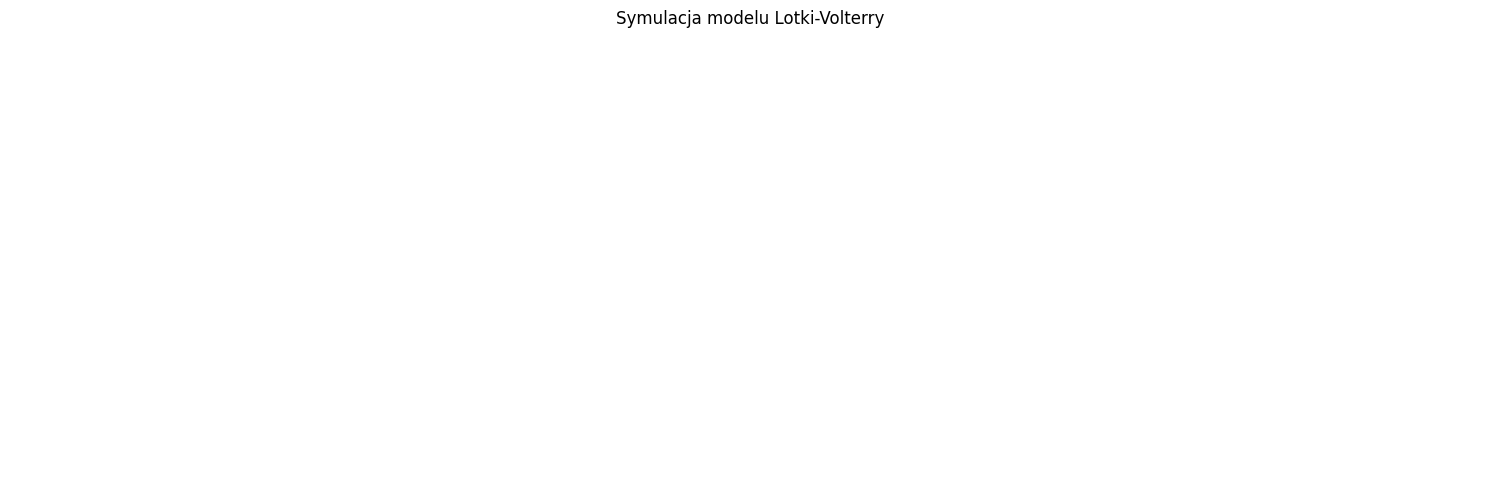

In [12]:
import asyncio
%matplotlib widget
fig = plt.figure(figsize=(15, 5))
fig.suptitle("Symulacja modelu Lotki-Volterry")

async def update():
    for i in range(int(v1)):
        x = list(range(i*k + 2))
        zajace_akt = zajace[:i*k+2]
        wilki_akt = wilki[:i*k+2]
        plt.subplot(1, 2, 1)
        plt.cla()
        plt.plot(x, zajace_akt, label="Zające")
        plt.plot(x, wilki_akt, label="Wilki")
        plt.xlabel("Czas")
        plt.ylabel("Wielkość populacji")
        plt.legend(loc="best")
        plt.title("Wielkość obu populacji od czasu")

        plt.subplot(1, 2, 2)
        plt.cla()
        plt.scatter(zajace_akt, wilki_akt, s=10)
        plt.title("Populacja zająców od populacji wilków")
        plt.xlabel("Populacja zająców")
        plt.ylabel("Populacja wilków")

        fig.canvas.draw()

        await asyncio.sleep(0.05)

def start_click(b):
    loop = asyncio.get_event_loop()
    loop.create_task(update())

start_button = Button(description="Start", icon='play', button_style="success", layout=Layout(width='100px'))
start_button.on_click(start_click)

a1 = slider_a1.value
b1 = slider_b1.value
r1 = slider_r1.value
s1 = slider_s1.value
n1 = slider_n1.value
h1 = 0.2
zajace, wilki = populacje(80, 20, a1, b1, r1, s1, n1, h1)



k = 5
v1 = n1/k

display(slider_a1, slider_b1, slider_r1, slider_s1, slider_n1, start_button)